In [1]:
!pip install -qqq numpy matplotlib --progress-bar off

In [2]:
import json
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
results = {}

with open('Llama_results.json', 'r') as f:
    results['llama_results'] = json.load(f)
with open('OpenAI_results.json', 'r') as f:
    results['openai_results'] = json.load(f)
with open('sft_results.json', 'r') as f:
    results['sft_results'] = json.load(f)  

In [4]:
models = ['llama', 'sft', 'openai']
metrics = ['precision', 'recall', 'f1_scores']

In [5]:
metrics_0_shot = []
metrics_1_shot = []
for model in models:
    tmp_0 = []
    tmp_1 = []
    for metric in metrics:
        tmp_0.append(results[model + '_results']['0-shot'][metric])
        tmp_1.append(results[model + '_results']['1-shot'][metric])
    metrics_0_shot.append(tmp_0)
    metrics_1_shot.append(tmp_1)

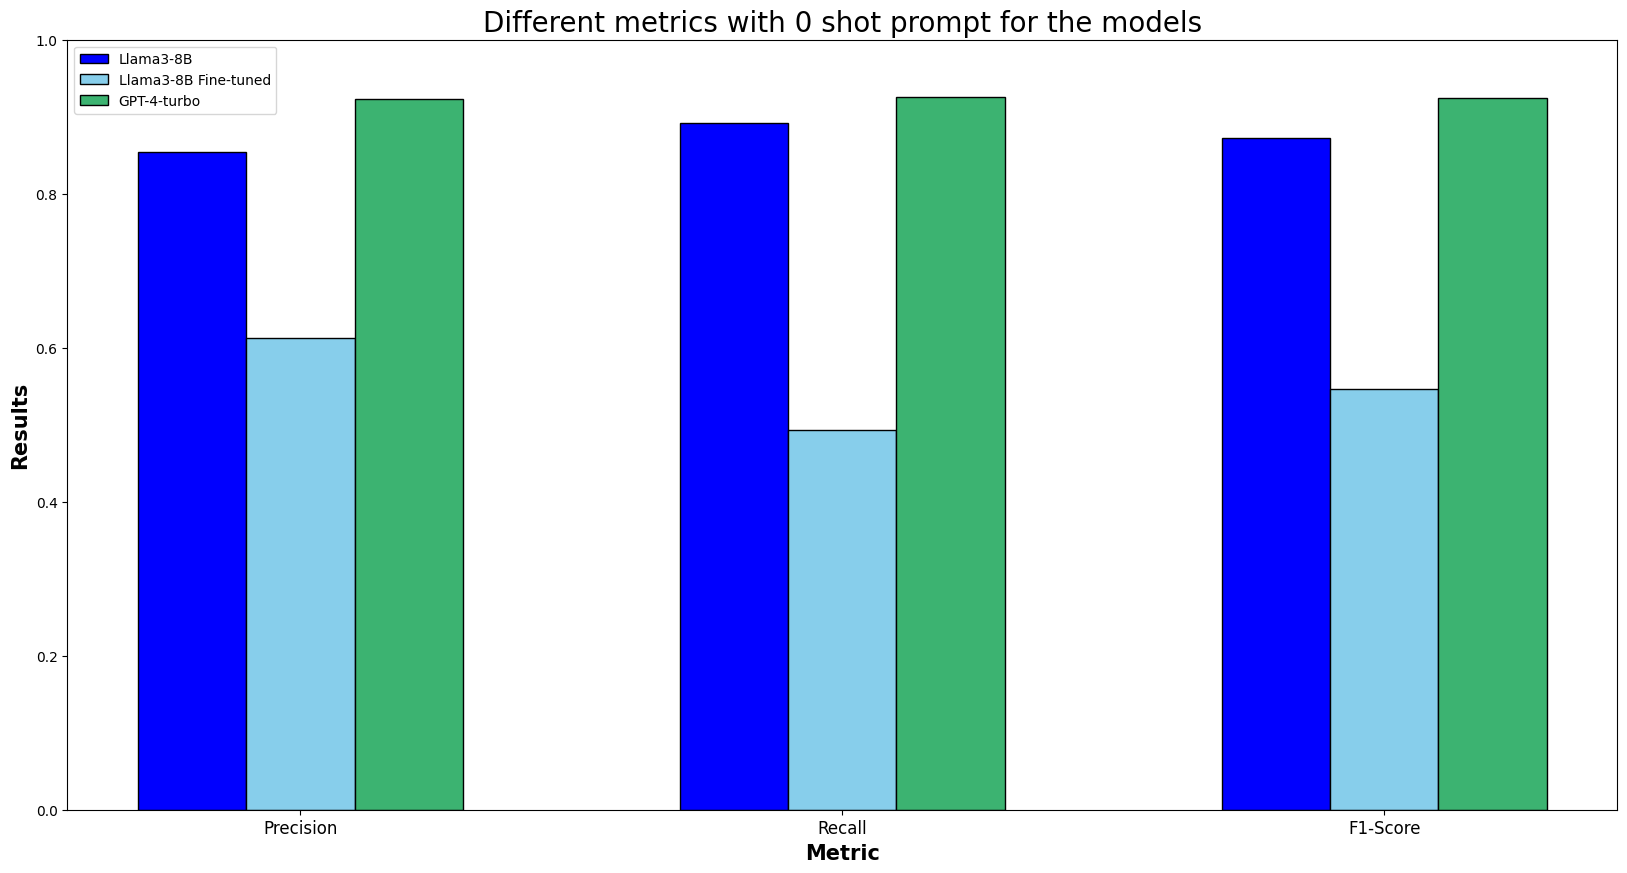

In [6]:
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(20, 10)) 

plt_models = ['Llama3-8B', 'Llama3-8B Fine-tuned', 'GPT-4o']
plt_metrics = ['Precision', 'Recall', 'F1-Score']
plt_data = {}
for index, model in enumerate(plt_models):
    plt_data[model] = metrics_0_shot[index]

# Set position of bar on X axis 
br1 = np.arange(len(metrics_0_shot[0])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, metrics_0_shot[0], color ='b', width = barWidth, 
		edgecolor ='black', label = plt_models[0]) 
plt.bar(br2, metrics_0_shot[1], color ='skyblue', width = barWidth, 
		edgecolor ='black', label = plt_models[1]) 
plt.bar(br3, metrics_0_shot[2], color ='mediumseagreen', width = barWidth, 
		edgecolor ='black', label = plt_models[2]) 

# Adding Xticks 
plt.xlabel('Metric', fontweight ='bold', fontsize = 15) 
plt.ylabel('Results', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(metrics_0_shot[0]))], 
		plt_metrics, fontsize = 12)
plt.ylim(0, 1)
plt.title('Different metrics with 0 shot prompt for the models', fontsize = 20)

plt.legend()
plt.savefig('bars.png')
plt.show()

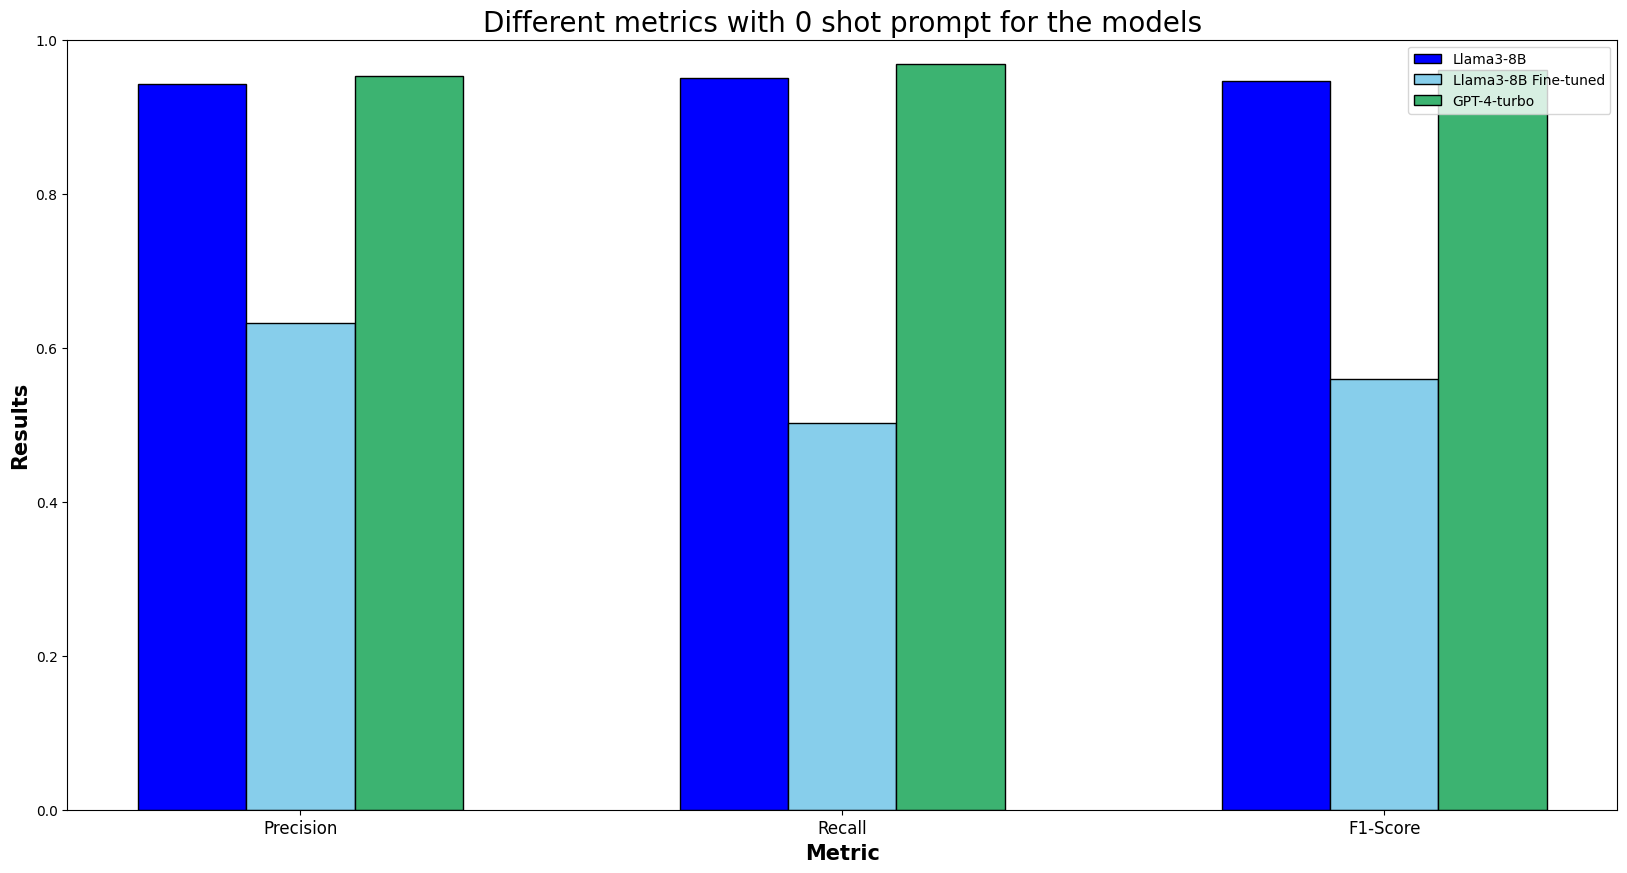

In [7]:
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(20, 10)) 

plt_models = ['Llama3-8B', 'Llama3-8B Fine-tuned', 'GPT-4-turbo']
plt_metrics = ['Precision', 'Recall', 'F1-Score']
plt_data = {}
for index, model in enumerate(plt_models):
    plt_data[model] = metrics_1_shot[index]

# Set position of bar on X axis 
br1 = np.arange(len(metrics_1_shot[0])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, metrics_1_shot[0], color ='b', width = barWidth, 
		edgecolor ='black', label = plt_models[0]) 
plt.bar(br2, metrics_1_shot[1], color ='skyblue', width = barWidth, 
		edgecolor ='black', label = plt_models[1]) 
plt.bar(br3, metrics_1_shot[2], color ='mediumseagreen', width = barWidth, 
		edgecolor ='black', label = plt_models[2]) 

# Adding Xticks 
plt.xlabel('Metric', fontweight ='bold', fontsize = 15) 
plt.ylabel('Results', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(metrics_1_shot[0]))], 
		plt_metrics, fontsize = 12)
plt.ylim(0, 1)
plt.title('Different metrics with 0 shot prompt for the models', fontsize = 20)

plt.legend()
plt.savefig('bars.png')
plt.show()